In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

In [2]:
# census_data = pd.read_csv('.\\CensusData\\b10Tf12OHBDV_data.csv', encoding='latin1')
census_data1 = pd.read_csv('..\\CensusData\\1dImykxT4_data.csv', encoding='latin1')
census_data2 = pd.read_csv('..\\CensusData\\kIjdGs5goie_data.csv', encoding='latin1')
census_data = pd.merge(census_data1, census_data2, how='inner', on='COL0', suffixes=('', '_y'))
headers = pd.read_csv(r'..\CensusData\header_edited.txt', sep=' - ')

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_18988\1467802173.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  headers = pd.read_csv(r'..\CensusData\header_edited.txt', sep=' - ')


In [3]:
# replace column names with headers
# census_data.columns = headers.iloc[:, 1].values

In [4]:
census_data

,COL0,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,...,COL5_y,COL6_y,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y
0,1001,Newfoundland and Labrador,1,Division No. 1,0,40000.0,35600.0,85880.0,31295.0,229275.0,...,32635.0,17230.0,14260.0,7855.0,9595.0,10500.0,5855.0,117175.0,4170.0,113010.0
1,10010165,Newfoundland and Labrador,1,Division No. 1,165,44000.0,38800.0,155.0,70.0,455.0,...,75.0,135.0,10.0,0.0,0.0,0.0,0.0,230.0,0.0,230.0
2,10010166,Newfoundland and Labrador,1,Division No. 1,166,46400.0,40000.0,80.0,50.0,250.0,...,70.0,40.0,10.0,0.0,0.0,0.0,0.0,125.0,0.0,125.0
3,10010167,Newfoundland and Labrador,1,Division No. 1,167,41600.0,36800.0,145.0,45.0,380.0,...,60.0,90.0,20.0,0.0,0.0,10.0,0.0,190.0,0.0,185.0
4,10010168,Newfoundland and Labrador,1,Division No. 1,168,41600.0,37200.0,205.0,70.0,530.0,...,120.0,115.0,15.0,0.0,0.0,0.0,0.0,275.0,0.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58224,62080024,Nunavut,8,Kitikmeot,24,49200.0,44800.0,65.0,75.0,330.0,...,50.0,25.0,45.0,10.0,0.0,0.0,10.0,140.0,10.0,135.0
58225,62080025,Nunavut,8,Kitikmeot,25,28600.0,27600.0,30.0,120.0,355.0,...,40.0,40.0,30.0,10.0,0.0,10.0,10.0,150.0,10.0,140.0
58226,62080026,Nunavut,8,Kitikmeot,26,27400.0,27000.0,50.0,200.0,585.0,...,60.0,35.0,45.0,25.0,30.0,35.0,10.0,250.0,10.0,240.0
58227,62080027,Nunavut,8,Kitikmeot,27,34000.0,33200.0,25.0,145.0,475.0,...,40.0,30.0,35.0,10.0,20.0,15.0,25.0,170.0,0.0,165.0


DA Map

In [7]:
da_shapefile = gpd.read_file(r'C:\Users\mwendwa.kiko\Documents\Personal_Kiko\OneDrive\OneDrive - University of Toronto\UofT\Research\EV Adoption\Dissemination_area_shapefile\lda_000b21a_e.shp')
da_shapefile

,DAUID,DGUID,LANDAREA,PRUID,geometry
0,10010165,2021S051210010165,0.3817,10,"POLYGON ((8978199.943 2146681.889, 8978191.283..."
1,10010166,2021S051210010166,0.0954,10,"POLYGON ((8978655.237 2146599.654, 8978545.646..."
2,10010167,2021S051210010167,0.1265,10,"POLYGON ((8978582.477 2146647.18, 8978545.486 ..."
3,10010168,2021S051210010168,0.1911,10,"POLYGON ((8978846.749 2147522.749, 8978855.369..."
4,10010169,2021S051210010169,0.0662,10,"POLYGON ((8978347.594 2146972.786, 8978272.194..."
...,...,...,...,...,...
57927,62080024,2021S051262080024,0.4006,62,"POLYGON ((5692727.891 3672467.174, 5692835.757..."
57928,62080025,2021S051262080025,287.3941,62,"MULTIPOLYGON (((5263454.031 3662224.177, 52634..."
57929,62080026,2021S051262080026,251.5981,62,"MULTIPOLYGON (((5273326.123 3651158.637, 52732..."
57930,62080027,2021S051262080027,24.6458,62,"POLYGON ((6043994.743 3573170.097, 6043992.391..."


In [8]:
da_shapefile['DAUID'] = da_shapefile['DAUID'].astype(int)

In [9]:
da_shapefile = da_shapefile.merge(census_data, how='left', left_on='DAUID', right_on='COL0')
da_shapefile

,DAUID,DGUID,LANDAREA,PRUID,geometry,COL0,COL1,COL2,COL3,COL4,...,COL5_y,COL6_y,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y
0,10010165,2021S051210010165,0.3817,10,"POLYGON ((8978199.943 2146681.889, 8978191.283...",10010165,Newfoundland and Labrador,1,Division No. 1,165,...,75.0,135.0,10.0,0.0,0.0,0.0,0.0,230.0,0.0,230.0
1,10010166,2021S051210010166,0.0954,10,"POLYGON ((8978655.237 2146599.654, 8978545.646...",10010166,Newfoundland and Labrador,1,Division No. 1,166,...,70.0,40.0,10.0,0.0,0.0,0.0,0.0,125.0,0.0,125.0
2,10010167,2021S051210010167,0.1265,10,"POLYGON ((8978582.477 2146647.18, 8978545.486 ...",10010167,Newfoundland and Labrador,1,Division No. 1,167,...,60.0,90.0,20.0,0.0,0.0,10.0,0.0,190.0,0.0,185.0
3,10010168,2021S051210010168,0.1911,10,"POLYGON ((8978846.749 2147522.749, 8978855.369...",10010168,Newfoundland and Labrador,1,Division No. 1,168,...,120.0,115.0,15.0,0.0,0.0,0.0,0.0,275.0,0.0,275.0
4,10010169,2021S051210010169,0.0662,10,"POLYGON ((8978347.594 2146972.786, 8978272.194...",10010169,Newfoundland and Labrador,1,Division No. 1,169,...,10.0,95.0,20.0,0.0,0.0,0.0,0.0,130.0,0.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57927,62080024,2021S051262080024,0.4006,62,"POLYGON ((5692727.891 3672467.174, 5692835.757...",62080024,Nunavut,8,Kitikmeot,24,...,50.0,25.0,45.0,10.0,0.0,0.0,10.0,140.0,10.0,135.0
57928,62080025,2021S051262080025,287.3941,62,"MULTIPOLYGON (((5263454.031 3662224.177, 52634...",62080025,Nunavut,8,Kitikmeot,25,...,40.0,40.0,30.0,10.0,0.0,10.0,10.0,150.0,10.0,140.0
57929,62080026,2021S051262080026,251.5981,62,"MULTIPOLYGON (((5273326.123 3651158.637, 52732...",62080026,Nunavut,8,Kitikmeot,26,...,60.0,35.0,45.0,25.0,30.0,35.0,10.0,250.0,10.0,240.0
57930,62080027,2021S051262080027,24.6458,62,"POLYGON ((6043994.743 3573170.097, 6043992.391...",62080027,Nunavut,8,Kitikmeot,27,...,40.0,30.0,35.0,10.0,20.0,15.0,25.0,170.0,0.0,165.0


# Old zone system

In [5]:
# Define the top-level folder that contains a subfolder for each province
base_folder = '..\\AggregatedZones_Nationwide'

# List to store GeoDataFrames from each province
province_gdfs = []

# Loop over each subfolder (each representing a province)
for province in os.listdir(base_folder):
    province_folder = os.path.join(base_folder, province)
    if os.path.isdir(province_folder):
        # Read every shapefile in the province folder
        shapefiles = [gpd.read_file(os.path.join(province_folder, f))
                      for f in os.listdir(province_folder) if f.endswith('.shp')]
        if shapefiles:
            # Concatenate the shapefiles into a single GeoDataFrame for the province
            province_gdf = pd.concat(shapefiles, ignore_index=True)
            # Assign a unique ZoneID for each feature using the province name as prefix
            # e.g., "Manitoba_1", "all_zones_2", etc.
            province_gdf['ZoneID'] = province + '_' + (province_gdf.index + 1).astype(str)
            province_gdfs.append(province_gdf)

# Combine all provinces into one GeoDataFrame
zones_old = pd.concat(province_gdfs, ignore_index=True)

In [10]:
zones_old = zones_old.to_crs(da_shapefile.crs)

In [11]:
joined_old = gpd.sjoin(
        da_shapefile,
        zones_old[["ZoneID", "geometry"]],      # keep only the zone ID + geometry
        how="inner",
        predicate="within"
    )

In [12]:
joined_old

,DAUID,DGUID,LANDAREA,PRUID,geometry,COL0,COL1,COL2,COL3,COL4,...,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y,index_right,ZoneID
0,10010165,2021S051210010165,0.3817,10,"POLYGON ((8978199.943 2146681.889, 8978191.283...",10010165,Newfoundland and Labrador,1,Division No. 1,165,...,10.0,0.0,0.0,0.0,0.0,230.0,0.0,230.0,43,NewLab_1
1,10010166,2021S051210010166,0.0954,10,"POLYGON ((8978655.237 2146599.654, 8978545.646...",10010166,Newfoundland and Labrador,1,Division No. 1,166,...,10.0,0.0,0.0,0.0,0.0,125.0,0.0,125.0,43,NewLab_1
2,10010167,2021S051210010167,0.1265,10,"POLYGON ((8978582.477 2146647.18, 8978545.486 ...",10010167,Newfoundland and Labrador,1,Division No. 1,167,...,20.0,0.0,0.0,10.0,0.0,190.0,0.0,185.0,43,NewLab_1
3,10010168,2021S051210010168,0.1911,10,"POLYGON ((8978846.749 2147522.749, 8978855.369...",10010168,Newfoundland and Labrador,1,Division No. 1,168,...,15.0,0.0,0.0,0.0,0.0,275.0,0.0,275.0,43,NewLab_1
4,10010169,2021S051210010169,0.0662,10,"POLYGON ((8978347.594 2146972.786, 8978272.194...",10010169,Newfoundland and Labrador,1,Division No. 1,169,...,20.0,0.0,0.0,0.0,0.0,130.0,0.0,130.0,43,NewLab_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57881,61060164,2021S051261060164,20.5839,61,"POLYGON ((5093136.6 3096208.606, 5093324.883 3...",61060164,Northwest Territories,6,Region 6,164,...,15.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,103,Territories_1
57895,62040061,2021S051262040061,3.5177,62,"POLYGON ((7295012.011 3242517.694, 7294676.311...",62040061,Nunavut,4,Qikiqtaaluk,61,...,160.0,180.0,205.0,215.0,140.0,1200.0,250.0,950.0,104,Territories_2
57914,62050022,2021S051262050022,178.8314,62,"POLYGON ((6006086.774 3112449.474, 6006636.686...",62050022,Nunavut,5,Kivalliq,22,...,55.0,25.0,50.0,50.0,30.0,270.0,30.0,235.0,104,Territories_2
57915,62050023,2021S051262050023,0.3410,62,"POLYGON ((6004760.003 3106942.017, 6004765.46 ...",62050023,Nunavut,5,Kivalliq,23,...,30.0,10.0,10.0,10.0,0.0,170.0,15.0,160.0,104,Territories_2


<Axes: >

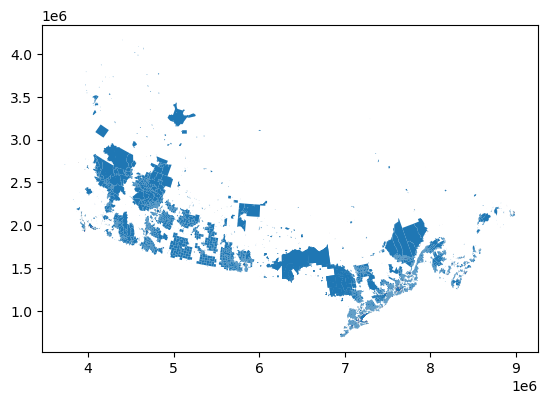

In [41]:
joined_old.plot()

In [13]:
# 4. Build an aggregation dictionary:
#    - median for income
#    - sum for all other numeric columns
agg_dict = {}
for col in joined_old.columns:
    if col in ["ZoneID", joined_old.geometry.name]:
        continue
    if col == "COL5" or col == "COL6" or col == "COL33":
        agg_dict[col] = "median"
    elif col == "COL30":
        agg_dict[col] = "mean"
    elif joined_old[col].dtype.kind in ("i", "u", "f"):  # int/uint/float
        agg_dict[col] = "sum"

In [14]:
# 5. Dissolve by zone_id (this unions the geometries) and applies our agg rules
result_old = (
    joined_old
    .dissolve(by="ZoneID", aggfunc=agg_dict)
    .reset_index()
)

In [15]:
result_old

,ZoneID,geometry,DAUID,LANDAREA,COL0,COL2,COL4,COL5,COL6,COL7,...,COL6_y,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y,index_right
0,Alberta_1,"MULTIPOLYGON (((4805058.646 2163910.68, 480517...",6831871753,46.9864,6831871753,1562,251753,48600.0,43200.0,32125.0,...,7265.0,7260.0,6080.0,5830.0,3790.0,2875.0,42255.0,11020.0,31195.0,0
1,Alberta_10,"MULTIPOLYGON (((4507052.586 2210636.531, 45070...",39728395142,181202.7354,39728395142,12797,425142,45200.0,40800.0,122340.0,...,21775.0,24505.0,17870.0,20220.0,16855.0,10560.0,168335.0,19540.0,148280.0,7425
2,Alberta_11,"MULTIPOLYGON (((4810091.946 2177855.723, 48094...",11209874071,55.7287,11209874071,2563,244071,40800.0,37600.0,34840.0,...,5410.0,5805.0,2165.0,2135.0,2065.0,2155.0,54535.0,7320.0,47095.0,2330
3,Alberta_12,"MULTIPOLYGON (((4792238.826 2158948.889, 47922...",19629424619,476.1823,19629424619,4488,544619,46000.0,41200.0,75545.0,...,9370.0,10140.0,7500.0,9895.0,14685.0,15715.0,121595.0,24170.0,97290.0,4488
4,Alberta_13,"MULTIPOLYGON (((4758730.483 2062341.66, 475869...",8466543830,3309.0634,8466543830,1825,293830,43200.0,39200.0,44110.0,...,4515.0,5475.0,5135.0,8275.0,10400.0,7825.0,56980.0,7125.0,49795.0,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Saskatchewan_4,"MULTIPOLYGON (((5239313.849 1681379.617, 52392...",24325087467,28378.8199,24325087467,2580,287467,46000.0,41200.0,68020.0,...,10490.0,5270.0,2700.0,4485.0,8445.0,4880.0,93700.0,8525.0,84900.0,52217
102,Saskatchewan_5,"MULTIPOLYGON (((5030826.371 1598861.586, 50307...",48583145747,127184.2414,48583145747,12593,215747,39200.0,36400.0,79080.0,...,16545.0,9100.0,3280.0,4635.0,4960.0,3245.0,112745.0,4225.0,108165.0,105162
103,Territories_1,"MULTIPOLYGON (((4946299.66 2942731.58, 4945920...",5249839306,29095.3869,5249839306,383,9306,62000.0,54400.0,7655.0,...,3130.0,2860.0,1140.0,675.0,845.0,655.0,14140.0,1485.0,12650.0,8858
104,Territories_2,"MULTIPOLYGON (((6006147.529 3106018.046, 60060...",248190130,183.0574,248190130,19,130,34600.0,33600.0,360.0,...,260.0,270.0,225.0,265.0,275.0,170.0,1775.0,305.0,1470.0,416


Merge with coefficients

In [18]:
params = pd.read_csv('..\\results_csv_m_p_q_provided_90_perc_05_01_26_sales.csv', sep=';')
params

,ZoneID,p,p_se,p_t,q,q_se,q_t,m,R2,RMSE
0,Alberta_1,0.000094,0.000036,2.630238,0.069381,0.005125,13.538979,335.600000,0.826359,3.130661
1,Alberta_10,0.000668,0.000275,2.426473,0.013030,0.005664,2.300434,375.685881,0.079671,2.332584
2,Alberta_11,0.000301,0.000081,3.741392,0.041539,0.003402,12.211705,341.500000,0.724502,2.242566
3,Alberta_12,0.000074,0.000030,2.472834,0.071955,0.005100,14.109908,309.761203,0.718125,3.922703
4,Alberta_13,1.041295,3.102811,0.335597,-1.025165,3.071279,-0.333791,51.939706,0.026678,0.157923
...,...,...,...,...,...,...,...,...,...,...
90,Saskatchewan_1,0.000090,0.000068,1.308609,0.066185,0.010299,6.426310,115.406297,0.422516,1.817948
91,Saskatchewan_2,0.000046,0.000024,1.949687,0.071313,0.006880,10.365410,249.645863,0.765705,1.931339
92,Saskatchewan_3,0.000306,0.000097,3.152445,0.048183,0.004055,11.883161,201.000000,0.668151,2.055961
93,Saskatchewan_4,0.000143,0.000068,2.102269,0.049550,0.006635,7.467770,278.394425,0.590329,1.990464


In [19]:
params['ZoneID'] = params['ZoneID'].str.replace('ON', 'Ontario')
params['ZoneID'] = params['ZoneID'].str.replace('QC', 'Quebec')
params['ZoneID'] = params['ZoneID'].str.replace('BC', 'BritishColumbia')

In [20]:
params_variables_old = pd.merge(params, result_old.drop('geometry', axis=1), left_on='ZoneID', right_on='ZoneID', how='inner')
params_variables_old

,ZoneID,p,p_se,p_t,q,q_se,q_t,m,R2,RMSE,...,COL6_y,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y,index_right
0,Alberta_1,0.000094,0.000036,2.630238,0.069381,0.005125,13.538979,335.600000,0.826359,3.130661,...,7265.0,7260.0,6080.0,5830.0,3790.0,2875.0,42255.0,11020.0,31195.0,0
1,Alberta_10,0.000668,0.000275,2.426473,0.013030,0.005664,2.300434,375.685881,0.079671,2.332584,...,21775.0,24505.0,17870.0,20220.0,16855.0,10560.0,168335.0,19540.0,148280.0,7425
2,Alberta_11,0.000301,0.000081,3.741392,0.041539,0.003402,12.211705,341.500000,0.724502,2.242566,...,5410.0,5805.0,2165.0,2135.0,2065.0,2155.0,54535.0,7320.0,47095.0,2330
3,Alberta_12,0.000074,0.000030,2.472834,0.071955,0.005100,14.109908,309.761203,0.718125,3.922703,...,9370.0,10140.0,7500.0,9895.0,14685.0,15715.0,121595.0,24170.0,97290.0,4488
4,Alberta_13,1.041295,3.102811,0.335597,-1.025165,3.071279,-0.333791,51.939706,0.026678,0.157923,...,4515.0,5475.0,5135.0,8275.0,10400.0,7825.0,56980.0,7125.0,49795.0,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Saskatchewan_1,0.000090,0.000068,1.308609,0.066185,0.010299,6.426310,115.406297,0.422516,1.817948,...,10475.0,4335.0,1780.0,2190.0,3860.0,2920.0,63735.0,10905.0,52635.0,25382
91,Saskatchewan_2,0.000046,0.000024,1.949687,0.071313,0.006880,10.365410,249.645863,0.765705,1.931339,...,6870.0,4195.0,1975.0,3520.0,4300.0,2310.0,49905.0,5105.0,44645.0,27027
92,Saskatchewan_3,0.000306,0.000097,3.152445,0.048183,0.004055,11.883161,201.000000,0.668151,2.055961,...,5690.0,2620.0,1815.0,1965.0,2370.0,980.0,36590.0,5155.0,31345.0,15800
93,Saskatchewan_4,0.000143,0.000068,2.102269,0.049550,0.006635,7.467770,278.394425,0.590329,1.990464,...,10490.0,5270.0,2700.0,4485.0,8445.0,4880.0,93700.0,8525.0,84900.0,52217


In [21]:
params_variables_old.dropna(inplace=True)
params_variables_old

,ZoneID,p,p_se,p_t,q,q_se,q_t,m,R2,RMSE,...,COL6_y,COL7_y,COL8_y,COL9_y,COL10_y,COL11_y,COL12_y,COL13_y,COL14_y,index_right
0,Alberta_1,0.000094,0.000036,2.630238,0.069381,0.005125,13.538979,335.600000,0.826359,3.130661,...,7265.0,7260.0,6080.0,5830.0,3790.0,2875.0,42255.0,11020.0,31195.0,0
1,Alberta_10,0.000668,0.000275,2.426473,0.013030,0.005664,2.300434,375.685881,0.079671,2.332584,...,21775.0,24505.0,17870.0,20220.0,16855.0,10560.0,168335.0,19540.0,148280.0,7425
2,Alberta_11,0.000301,0.000081,3.741392,0.041539,0.003402,12.211705,341.500000,0.724502,2.242566,...,5410.0,5805.0,2165.0,2135.0,2065.0,2155.0,54535.0,7320.0,47095.0,2330
3,Alberta_12,0.000074,0.000030,2.472834,0.071955,0.005100,14.109908,309.761203,0.718125,3.922703,...,9370.0,10140.0,7500.0,9895.0,14685.0,15715.0,121595.0,24170.0,97290.0,4488
4,Alberta_13,1.041295,3.102811,0.335597,-1.025165,3.071279,-0.333791,51.939706,0.026678,0.157923,...,4515.0,5475.0,5135.0,8275.0,10400.0,7825.0,56980.0,7125.0,49795.0,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Saskatchewan_1,0.000090,0.000068,1.308609,0.066185,0.010299,6.426310,115.406297,0.422516,1.817948,...,10475.0,4335.0,1780.0,2190.0,3860.0,2920.0,63735.0,10905.0,52635.0,25382
91,Saskatchewan_2,0.000046,0.000024,1.949687,0.071313,0.006880,10.365410,249.645863,0.765705,1.931339,...,6870.0,4195.0,1975.0,3520.0,4300.0,2310.0,49905.0,5105.0,44645.0,27027
92,Saskatchewan_3,0.000306,0.000097,3.152445,0.048183,0.004055,11.883161,201.000000,0.668151,2.055961,...,5690.0,2620.0,1815.0,1965.0,2370.0,980.0,36590.0,5155.0,31345.0,15800
93,Saskatchewan_4,0.000143,0.000068,2.102269,0.049550,0.006635,7.467770,278.394425,0.590329,1.990464,...,10490.0,5270.0,2700.0,4485.0,8445.0,4880.0,93700.0,8525.0,84900.0,52217


Creating new variables of interest

In [22]:
params_variables_old['renter_proportion'] = params_variables_old['COL7'] / (params_variables_old['COL7'] + params_variables_old['COL8'])
params_variables_old['bachelor_proportion'] = params_variables_old['COL12'] / (params_variables_old['COL9'] + params_variables_old['COL10'] + params_variables_old['COL11'] + params_variables_old['COL12'])
params_variables_old['commute_close_proportion'] = params_variables_old['COL14'] / params_variables_old['COL13']
params_variables_old['commute_far_proportion'] = params_variables_old['COL17'] / params_variables_old['COL13']
params_variables_old['commute_car_proportion'] = params_variables_old['COL19'] / params_variables_old['COL18']
params_variables_old['commute_public_proportion'] = params_variables_old['COL20'] / params_variables_old['COL18']
params_variables_old['commute_bike_proportion'] = params_variables_old['COL22'] / params_variables_old['COL18']
params_variables_old['commute_walk_proportion'] = params_variables_old['COL21'] / params_variables_old['COL18']
params_variables_old['commute_short_proportion'] = params_variables_old['COL25'] / params_variables_old['COL24']
params_variables_old['commute_long_proportion'] = params_variables_old['COL29'] / params_variables_old['COL24']
params_variables_old['popn_density'] = params_variables_old['COL31'] / params_variables_old['COL32']
params_variables_old['pct_condominium'] = params_variables_old['COL14_y'] / params_variables_old['COL12_y']
params_variables_old['pct_new'] = (params_variables_old['COL11_y'] + params_variables_old['COL10_y'])/ params_variables_old['COL3_y']

In [23]:
params_variables_old.to_csv('params_variables_old_05_01_26_sales.csv', index=False)